In [93]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [94]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [95]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [96]:
df = data.copy()

## EDA

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [98]:
df.shape

(244, 14)

In [99]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


# Exploratory Data Anaylsis

In [100]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 1 categorical features : ['Classes']


In [101]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

fire             53.688525
not fire         40.163934
fire              2.049180
not fire          2.049180
fire              0.819672
not fire          0.409836
not fire          0.409836
not fire          0.409836
Name: Classes, dtype: float64
---------------------------


## Univariate Anaylsis

### Numeric Features

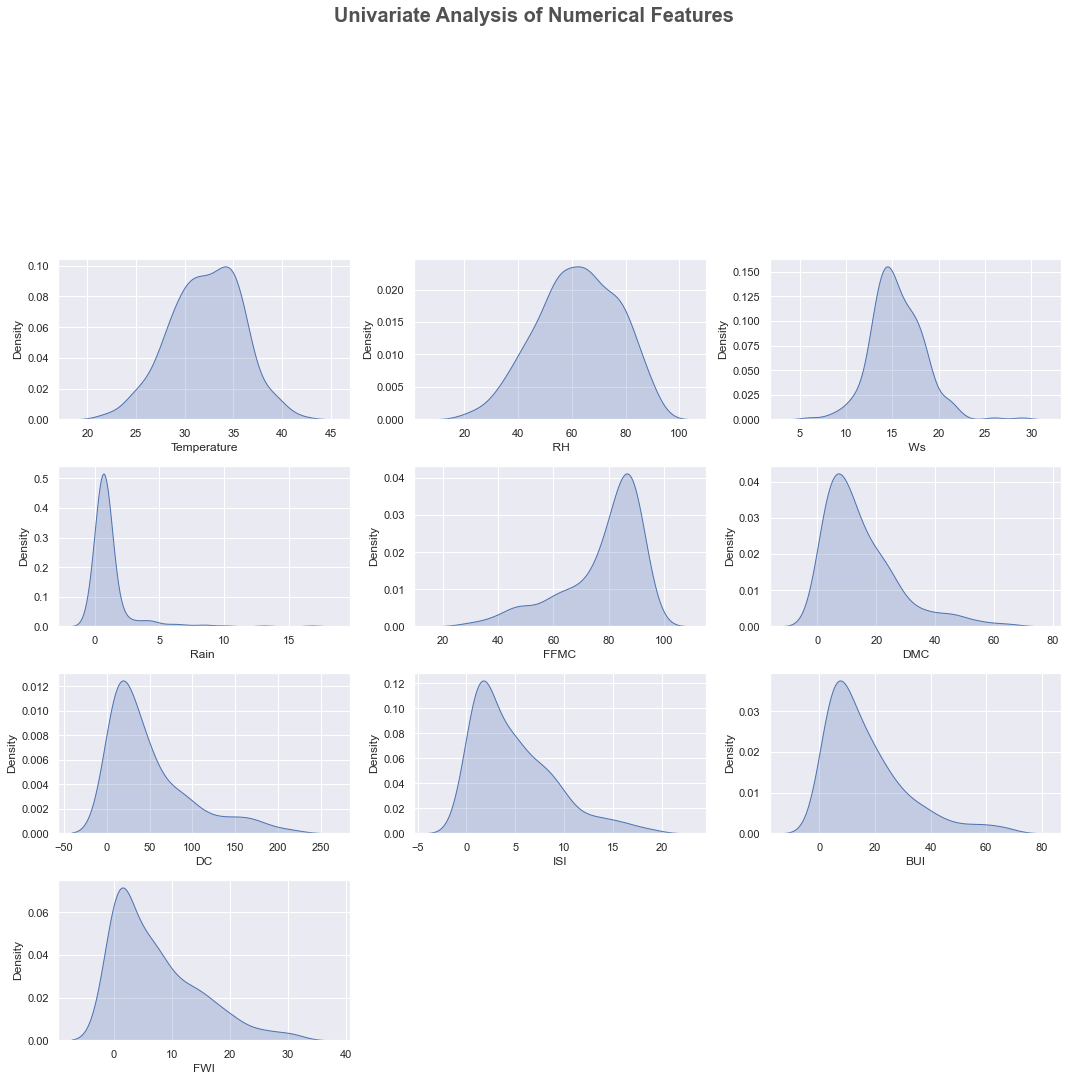

In [145]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(3, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**report**
 * Temperature,RH,WS are slightliy showing normal distribution
 * FWI,DC,BUI,ISI,FWI,RAIN,DMC are Right Skewed
 * FFMC is left skewed


In [102]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [103]:
df['FWI'] = df['FWI'].replace(0,df['FWI'].mean())
df['DC'] = df['DC'].replace(0,df['DC'].mean())
df['BUI'] = df['BUI'].replace(0,df['BUI'].mean())
df['Rain '] = df['Rain '].replace(0,df['Rain '].mean())
df['ISI'] = df['ISI'].replace(0,df['ISI'].mean())
df['FWI'] = df['FWI'].replace(0,df['FWI'].mean())
df['DMC'] = df['DMC'].replace(0,df['DMC'].mean())
df['FFMC'] = df['FFMC'].replace(0,df['FFMC'].mean())

<AxesSubplot:>

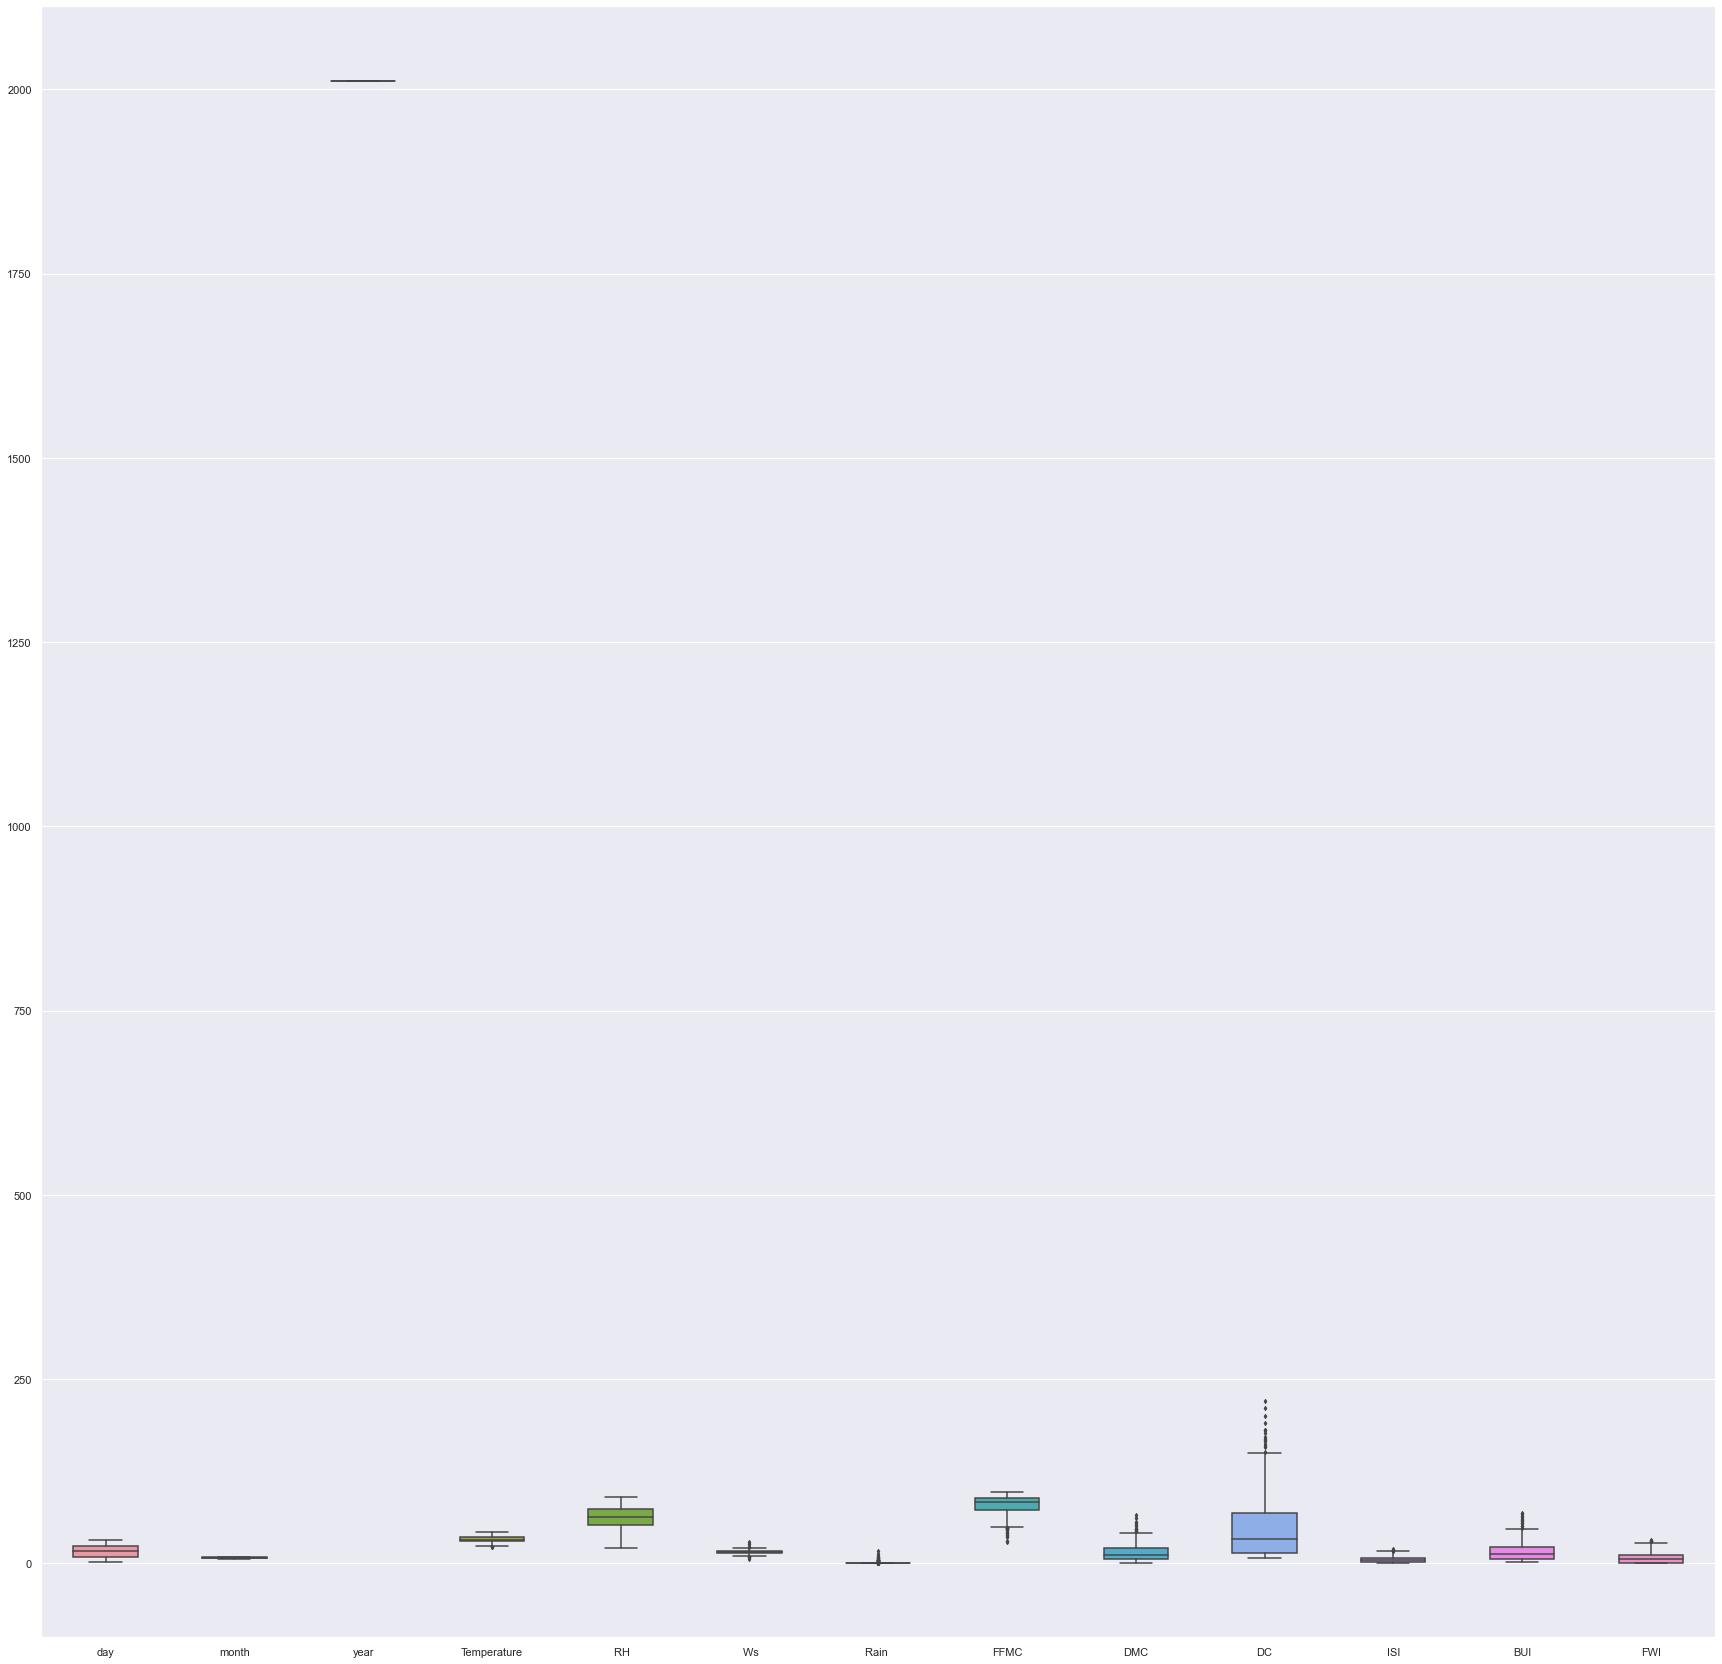

In [104]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [105]:
q = df['FWI'].quantile(0.99)
data_cleaned = df[df['FWI']<q]
q = data_cleaned['DC'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['DC']<q]
q = data_cleaned['BUI'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['BUI']<q]
q = data_cleaned['Rain '].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Rain ']<q]
q = data_cleaned['ISI'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['ISI']<q]
q = data_cleaned['DMC'].quantile(0.9)
data_cleaned  = data_cleaned[data_cleaned['DMC']<q]


In [106]:
data_cleaned

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.760656,65.7,3.4,7.6,1.30000,3.4,0.500000,not fire
1,2,6,2012,29,61,13,1.300000,64.4,4.1,7.6,1.00000,3.9,0.400000,not fire
3,4,6,2012,25,89,13,2.500000,28.6,1.3,6.9,4.77418,1.7,7.035391,not fire
4,5,6,2012,27,77,16,0.760656,64.8,3.0,14.2,1.20000,3.9,0.500000,not fire
5,6,6,2012,31,67,14,0.760656,82.6,5.8,22.2,3.10000,7.0,2.500000,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.760656,85.4,16.0,44.5,4.50000,16.9,6.500000,fire
240,27,9,2012,28,87,15,4.400000,41.1,6.5,8.0,0.10000,6.2,7.035391,not fire
241,28,9,2012,27,87,29,0.500000,45.9,3.5,7.9,0.40000,3.4,0.200000,not fire
242,29,9,2012,24,54,18,0.100000,79.7,4.3,15.2,1.70000,5.1,0.700000,not fire


In [107]:
numeric_feature = [feature for feature in df.columns if data_cleaned[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if data_cleaned[feature].dtype =='O']

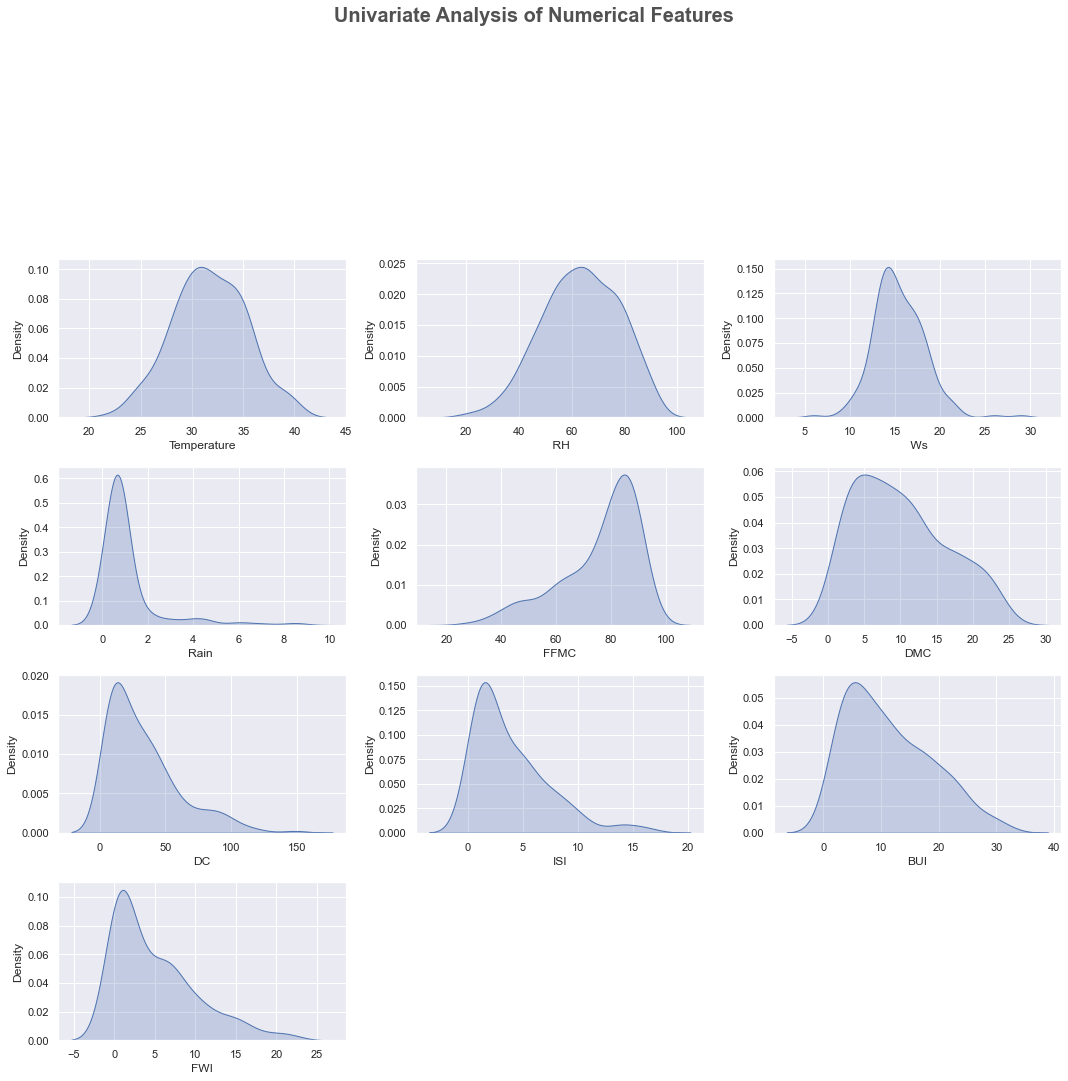

In [108]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(3, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data_cleaned[numeric_feature[i]],shade=True, color='b')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

In [109]:
df['DC_sqrt'] = np.sqrt(df['DC'])

In [110]:
df['FFMC_log'] = np.log(df['FFMC'])

<AxesSubplot:xlabel='DC_sqrt', ylabel='Density'>

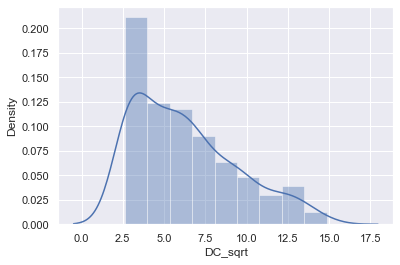

In [111]:
sns.distplot(df['DC_sqrt'])

<AxesSubplot:xlabel='FFMC_log', ylabel='Density'>

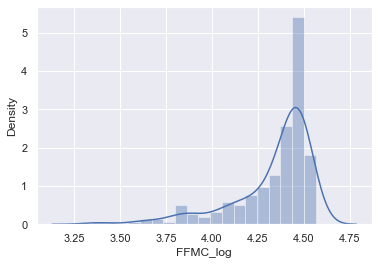

In [112]:
sns.distplot(df['FFMC_log'])

<AxesSubplot:>

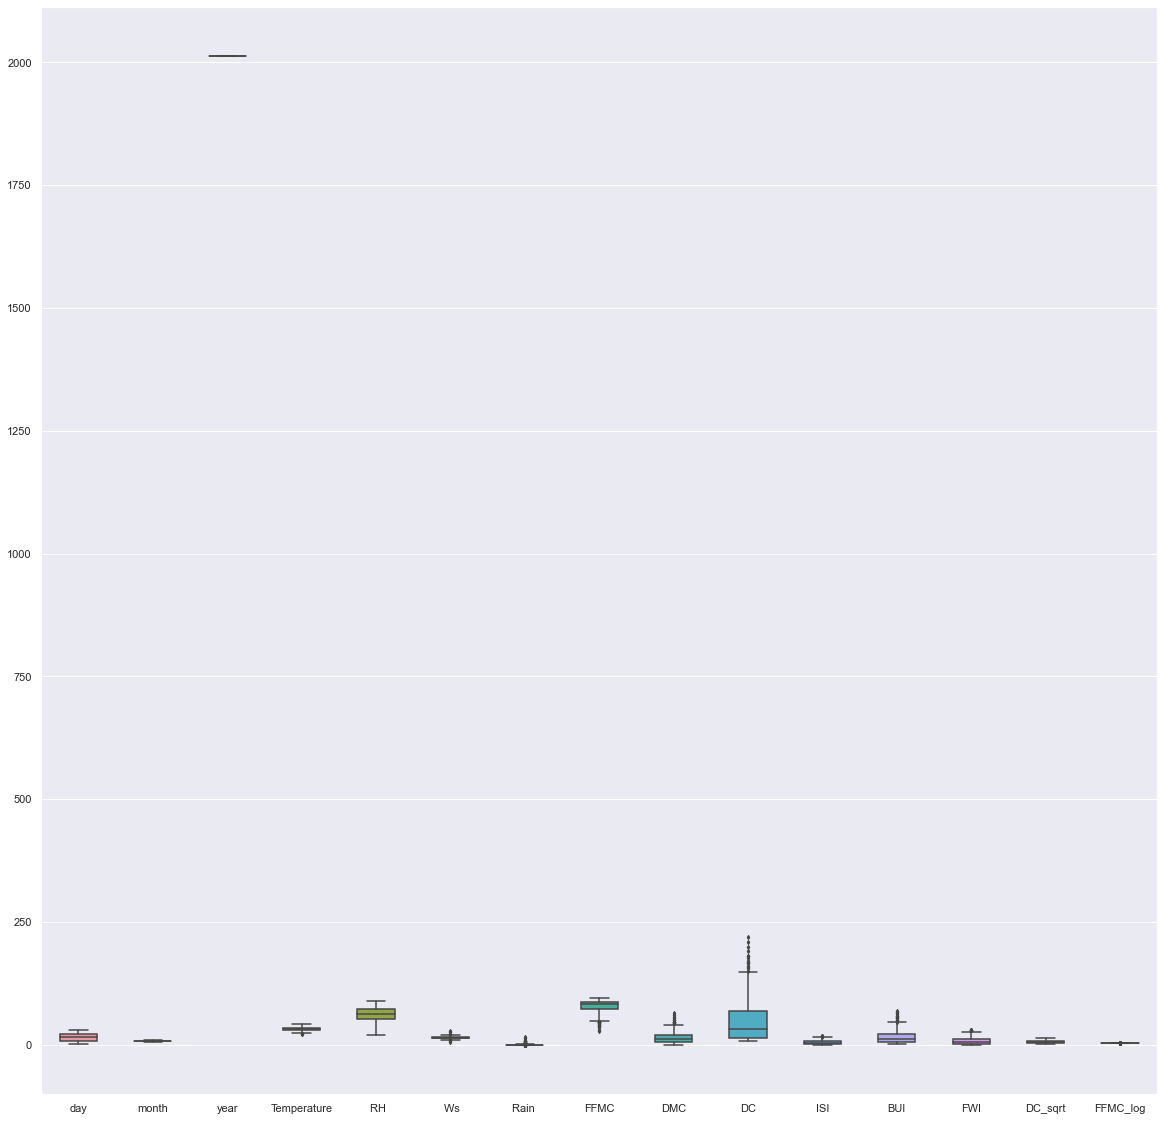

In [113]:

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

### Categorical Features

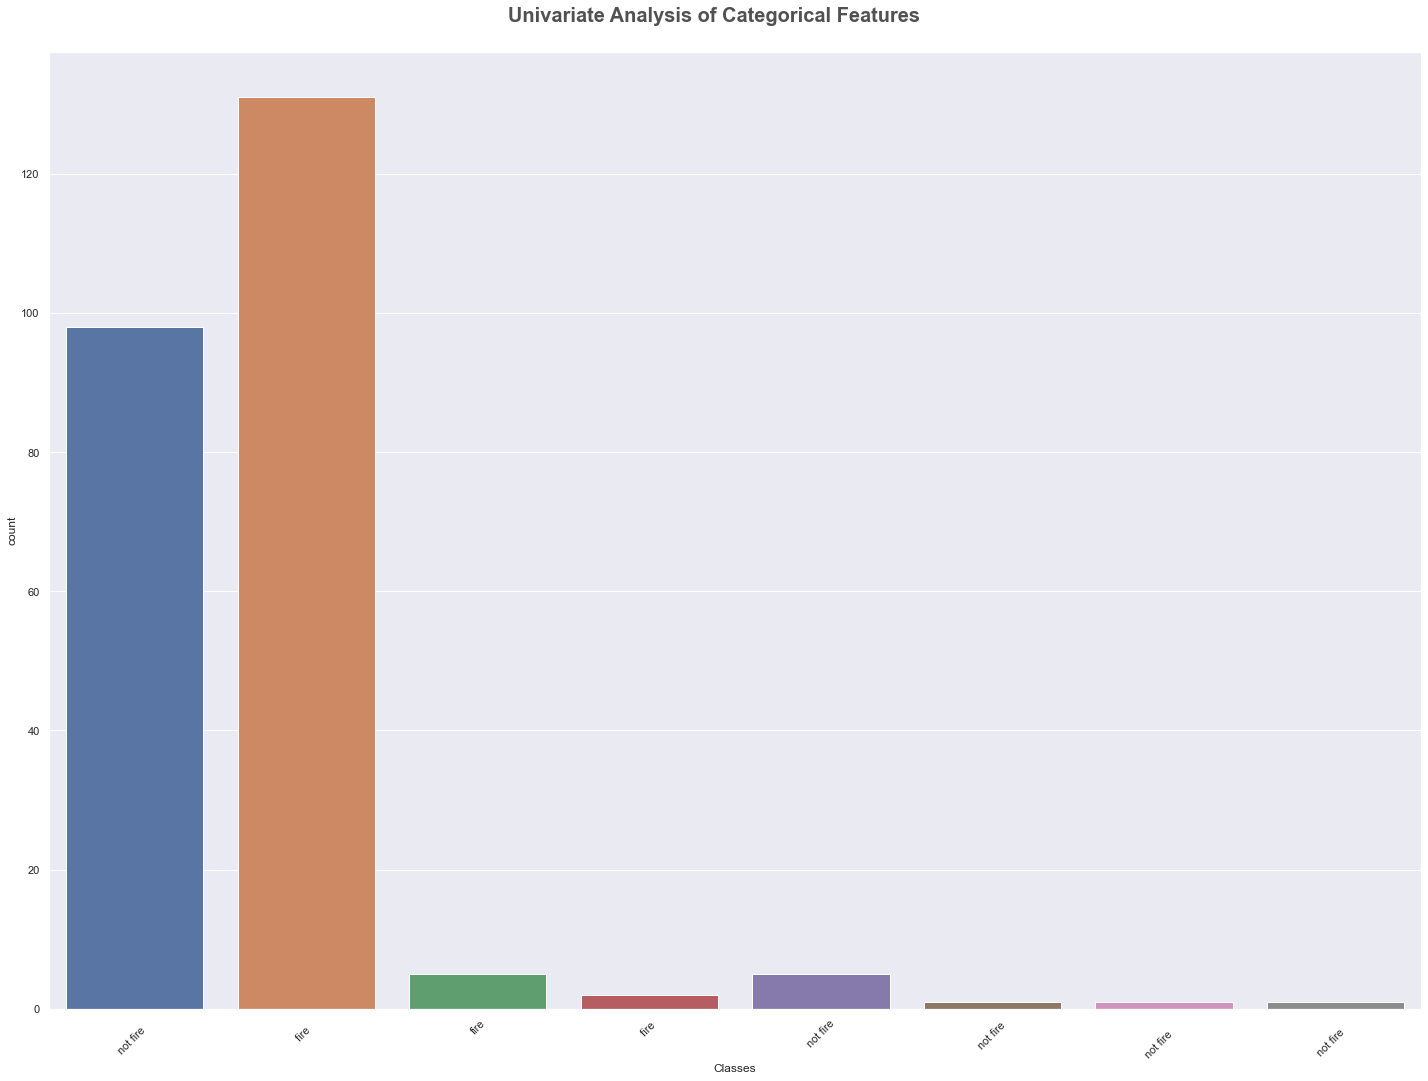

In [114]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(df['Classes'])
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.tight_layout()

In [115]:
df['Classes'].value_counts()

fire             131
not fire          98
fire               5
not fire           5
fire               2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [116]:
df['Classes'] = df['Classes'].replace(['not fire   ', 'fire   ','fire ','not fire ','not fire     ','not fire    '], ['not fire', 'fire','fire','fire','not fire','not fire'])

In [117]:
print(df['Classes'].unique())

['not fire' 'fire']


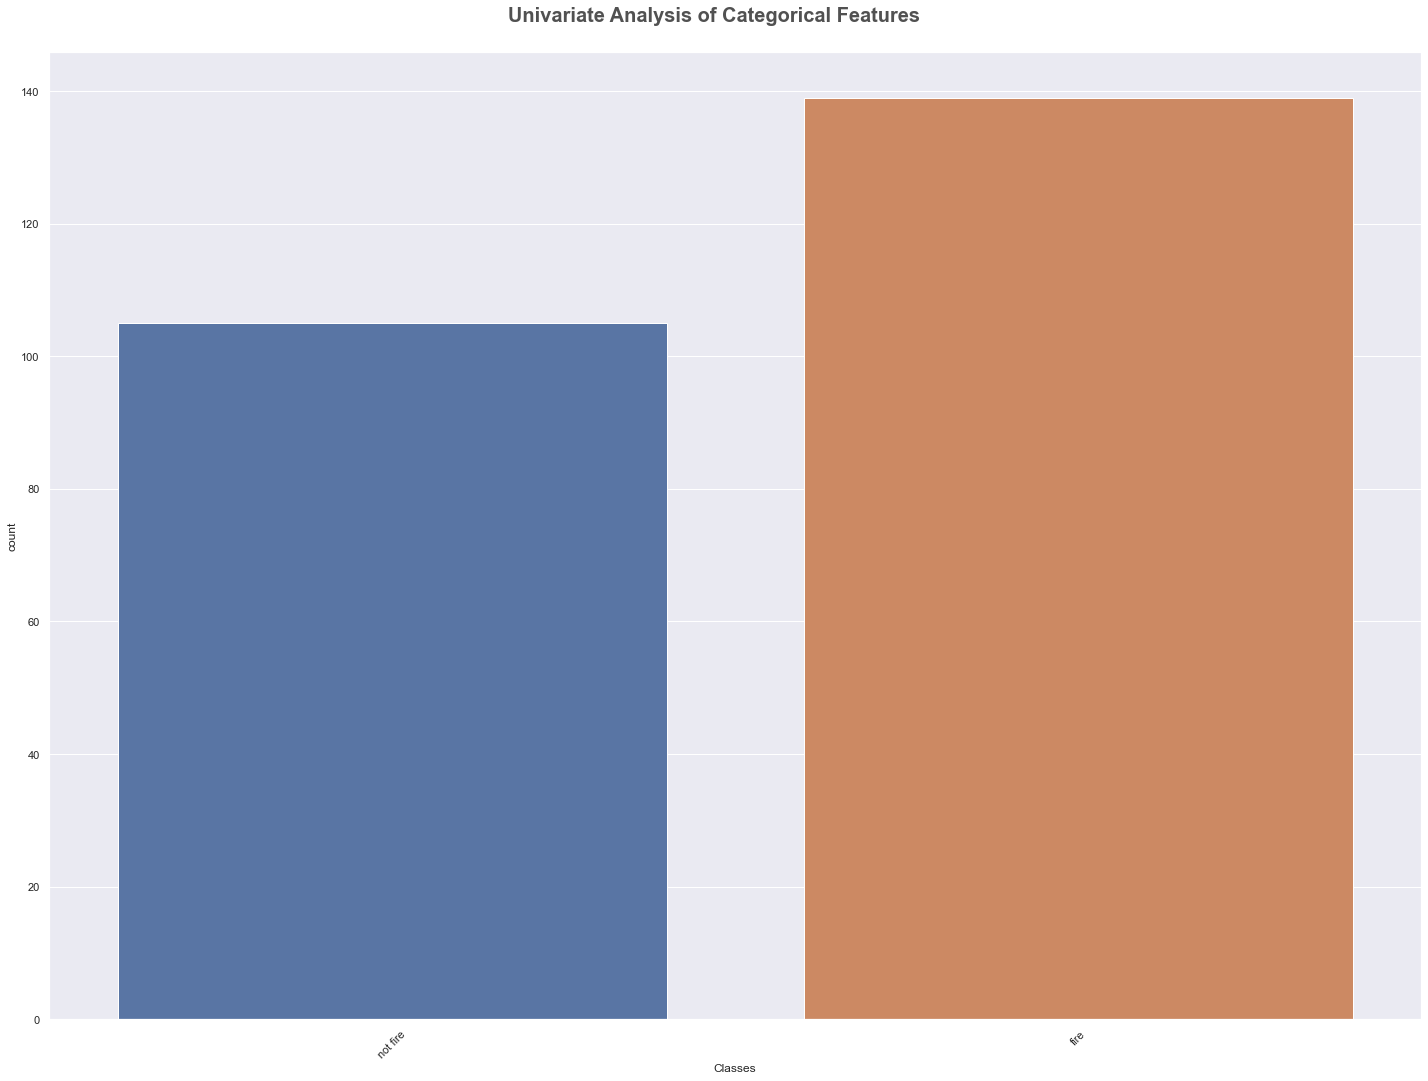

In [118]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(df['Classes'])
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.tight_layout()

## Multivariate Analysis

* multivariate analysis is the anaylsis of more than one variable

### Check Multicollinearity in Numerical features

In [119]:
df[(list(df.columns)[1:])].corr()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,DC_sqrt,FFMC_log
month,1.000000,NaN,-0.059017,-0.037884,-0.041447,0.047465,0.015577,0.068178,0.127669,0.049541,0.085822,0.100087,0.117125,0.004296
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.059017,NaN,1.000000,-0.654443,-0.278132,-0.297732,0.677491,0.483105,0.370511,0.584601,0.455504,0.519301,0.418860,0.658155
RH,-0.037884,NaN,-0.654443,1.000000,0.236084,0.214113,-0.645658,-0.405133,-0.220344,-0.664675,-0.348587,-0.533952,-0.274476,-0.622229
Ws,-0.041447,NaN,-0.278132,0.236084,1.000000,0.175675,-0.163255,-0.001246,0.076253,0.006925,0.029756,0.032312,0.041183,-0.159141
Rain,0.047465,NaN,-0.297732,0.214113,0.175675,1.000000,-0.454446,-0.216650,-0.236341,-0.235189,-0.227057,-0.195422,-0.309359,-0.463392
FFMC,0.015577,NaN,0.677491,-0.645658,-0.163255,-0.454446,1.000000,0.602391,0.503919,0.688539,0.589652,0.603418,0.611690,0.990155
DMC,0.068178,NaN,0.483105,-0.405133,-0.001246,-0.216650,0.602391,1.000000,0.875362,0.661267,0.982073,0.853979,0.869851,0.558653
DC,0.127669,NaN,0.370511,-0.220344,0.076253,-0.236341,0.503919,0.875362,1.000000,0.487703,0.941906,0.721153,0.976478,0.471611
ISI,0.049541,NaN,0.584601,-0.664675,0.006925,-0.235189,0.688539,0.661267,0.487703,1.000000,0.622846,0.908273,0.552478,0.608624


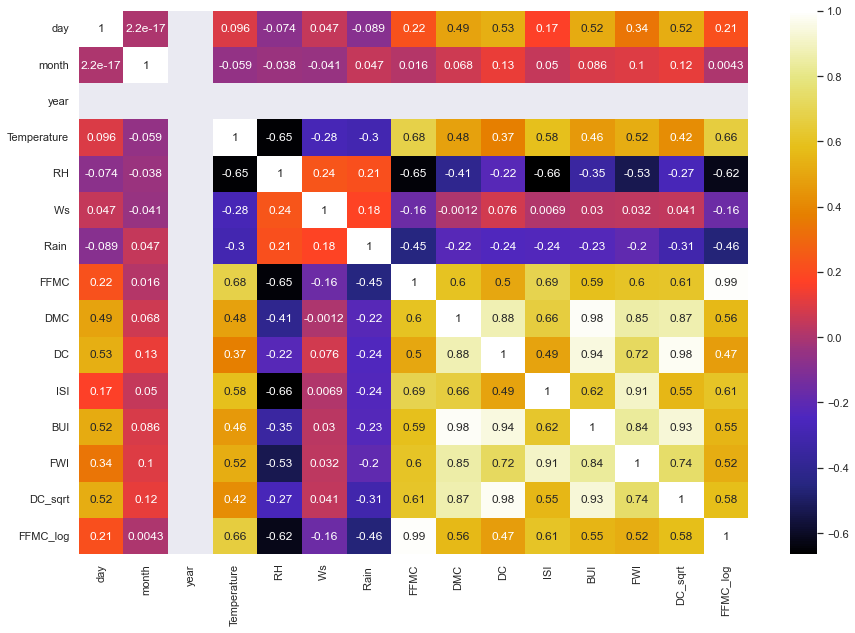

In [120]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Checking Null Values

In [121]:
df = df.dropna()
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
DC_sqrt        0
FFMC_log       0
dtype: int64

In [122]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,DC_sqrt,FFMC_log
0,1,6,2012,29,57,18,0.760656,65.7,3.4,7.6,1.30000,3.4,0.500000,not fire,2.756810,4.185099
1,2,6,2012,29,61,13,1.300000,64.4,4.1,7.6,1.00000,3.9,0.400000,not fire,2.756810,4.165114
2,3,6,2012,26,82,22,13.100000,47.1,2.5,7.1,0.30000,2.7,0.100000,not fire,2.664583,3.852273
3,4,6,2012,25,89,13,2.500000,28.6,1.3,6.9,4.77418,1.7,7.035391,not fire,2.626785,3.353407
4,5,6,2012,27,77,16,0.760656,64.8,3.0,14.2,1.20000,3.9,0.500000,not fire,3.768289,4.171306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.760656,85.4,16.0,44.5,4.50000,16.9,6.500000,fire,6.670832,4.447346
240,27,9,2012,28,87,15,4.400000,41.1,6.5,8.0,0.10000,6.2,7.035391,not fire,2.828427,3.716008
241,28,9,2012,27,87,29,0.500000,45.9,3.5,7.9,0.40000,3.4,0.200000,not fire,2.810694,3.826465
242,29,9,2012,24,54,18,0.100000,79.7,4.3,15.2,1.70000,5.1,0.700000,not fire,3.898718,4.378270


In [126]:
from sklearn.preprocessing import LabelEncoder
le_classes = LabelEncoder()
df['Classes'] = le_classes.fit_transform(df['Classes'])
df['Classes'].unique()

array([1, 0])

In [127]:
X = df.drop(columns = ['Classes','DC','FFMC'])
y = df['Classes']

In [128]:
X

,day,month,year,Temperature,RH,Ws,Rain,DMC,ISI,BUI,FWI,DC_sqrt,FFMC_log
0,1,6,2012,29,57,18,0.760656,3.4,1.30000,3.4,0.500000,2.756810,4.185099
1,2,6,2012,29,61,13,1.300000,4.1,1.00000,3.9,0.400000,2.756810,4.165114
2,3,6,2012,26,82,22,13.100000,2.5,0.30000,2.7,0.100000,2.664583,3.852273
3,4,6,2012,25,89,13,2.500000,1.3,4.77418,1.7,7.035391,2.626785,3.353407
4,5,6,2012,27,77,16,0.760656,3.0,1.20000,3.9,0.500000,3.768289,4.171306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.760656,16.0,4.50000,16.9,6.500000,6.670832,4.447346
240,27,9,2012,28,87,15,4.400000,6.5,0.10000,6.2,7.035391,2.828427,3.716008
241,28,9,2012,27,87,29,0.500000,3.5,0.40000,3.4,0.200000,2.810694,3.826465
242,29,9,2012,24,54,18,0.100000,4.3,1.70000,5.1,0.700000,3.898718,4.378270


In [129]:
y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes, Length: 243, dtype: int32

In [131]:

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [132]:

X_scaled

array([[-1.67279579, -1.35016751,  0.        , ..., -0.93145086,
        -1.14064512, -0.66802426],
       [-1.55947285, -1.35016751,  0.        , ..., -0.94515681,
        -1.14064512, -0.7582034 ],
       [-1.44614991, -1.35016751,  0.        , ..., -0.98627465,
        -1.17029295, -2.16982647],
       ...,
       [ 1.38692352,  1.34646842,  0.        , ..., -0.97256871,
        -1.12332326, -2.28627875],
       [ 1.50024646,  1.34646842,  0.        , ..., -0.90403897,
        -0.77356164,  0.20361494],
       [ 1.6135694 ,  1.34646842,  0.        , ..., -0.93145086,
        -0.72106593, -0.559453  ]])

In [133]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.516463,day
1,1.088694,month
2,NaN,year
3,2.398547,Temperature
4,2.734630,RH
5,1.253439,Ws
6,1.381215,Rain
7,57.824329,DMC
8,15.779588,ISI
9,105.377850,BUI


In [134]:

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [135]:

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)


LogisticRegression()

In [136]:
y_pred = log_reg.predict(x_test)

In [137]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9180327868852459

In [138]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[31,  4],
       [ 1, 25]], dtype=int64)

In [139]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]



In [140]:

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9180327868852459

In [141]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8857142857142857

In [142]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.96875

In [143]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9253731343283582

In [144]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9236263736263737